In [12]:
import DataLoader
import importlib
import pandas as pd
import CoverageHelper

%matplotlib inline
importlib.reload(DataLoader)
coverage_df = DataLoader.load_csv_coverage()


Number of apps: 
252


Total covered methods:
1734788


Everything is good!


In [13]:
coverage_df.head()

,package,class,method,strategy,coverage_type,coverage_percentage,covered_lines,total_lines,app
0,com.manheim.mobile.ManualVinEntry,com.manheim.mobile.ManualVinEntry.ManualEntryA...,ManualEntryActivity (): void,systematic,method,0,0,1,com.manheim.mobile
1,com.manheim.mobile.ManualVinEntry,com.manheim.mobile.ManualVinEntry.ManualEntryA...,ManualEntryActivity (): void,systematic,block,0,0,3,com.manheim.mobile
2,com.manheim.mobile.ManualVinEntry,com.manheim.mobile.ManualVinEntry.ManualEntryA...,access$000 (ManualEntryActivity): void,systematic,method,0,0,1,com.manheim.mobile
3,com.manheim.mobile.ManualVinEntry,com.manheim.mobile.ManualVinEntry.ManualEntryA...,access$000 (ManualEntryActivity): void,systematic,block,0,0,3,com.manheim.mobile
4,com.manheim.mobile.ManualVinEntry,com.manheim.mobile.ManualVinEntry.ManualEntryA...,access$100 (ManualEntryActivity): SelectableEd...,systematic,method,0,0,1,com.manheim.mobile


In [14]:
systematic_method_coverage = CoverageHelper.filter("method", "systematic", coverage_df)
systematic_coverage_per_app = systematic_method_coverage.groupby(["app"])['coverage_percentage'].apply(
    lambda x: x.sum() / x.count()).sort_values(ascending=False)
systematic_coverage_per_app.head()
# systematic_coverage_per_app.plot.box()


app
com.junjundroid.gordyn                              91.304348
com.snaptattooadder                                 81.538462
com.watchtv.freetv                                  78.947368
com.nglish.spanish.english.translator               75.342466
com.monotype.android.font.handwritefontstylefree    66.666667
Name: coverage_percentage, dtype: float64

In [15]:
random_method_coverage = CoverageHelper.filter("method", "random", coverage_df)
random_coverage_per_app = random_method_coverage.groupby(["app"])['coverage_percentage'].apply(
    lambda x: x.sum() / x.count()).sort_values(ascending=False)
random_coverage_per_app.head()
# random_coverage_per_app.plot.box()

app
com.snaptattooadder               95.384615
com.watchtv.freetv                94.736842
com.junjundroid.gordyn            91.304348
uk.co.resortmarketing.curryguy    64.627660
ru.alexko.regionalcodes           64.285714
Name: coverage_percentage, dtype: float64

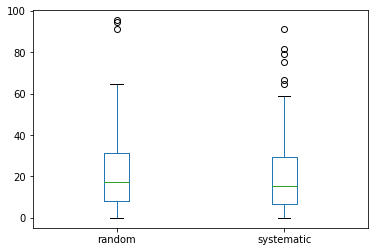

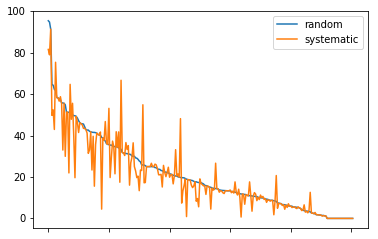

In [16]:
random_and_systematic_coverage = pd.concat(
    [random_coverage_per_app.rename('random'), systematic_coverage_per_app.rename('systematic')], axis=1,
    sort=False)
# random_and_systematic_coverage = random_and_systematic_coverage[
#     (random_and_systematic_coverage.random != 0) & (random_and_systematic_coverage.systematic != 0)]
random_and_systematic_coverage.plot.box()
random_and_systematic_coverage.plot()

In [17]:
random_and_systematic_coverage.describe()

,random,systematic
count,252.000000,252.000000
mean,21.395156,19.994028
std,18.172867,17.704611
min,0.000000,0.000000
25%,8.020505,6.508599
50%,17.226094,15.273761
75%,31.555451,29.340382
max,95.384615,91.304348


In [18]:
random_block_coverage_per_app = random_coverage_per_app = \
    CoverageHelper.filter("block", "random", coverage_df).groupby(["app"])[
        ['covered_lines', 'total_lines']].apply(
        lambda x: x.sum())
random_block_coverage_per_app['percentage_covered'] = (random_block_coverage_per_app.covered_lines / random_block_coverage_per_app.total_lines) * 100
random_block_coverage_per_app.head()
random_block_coverage_per_app.describe()


,covered_lines,total_lines,percentage_covered
count,252.000000,252.000000,252.000000
mean,4178.198413,41690.591270,19.177097
std,7302.330624,76213.849653,17.575658
min,0.000000,18.000000,0.000000
25%,347.250000,2116.250000,5.929015
50%,1480.500000,10568.500000,13.778127
75%,4470.500000,35218.250000,27.730758
max,41327.000000,498797.000000,91.884380


In [24]:
systematic_block_coverage_per_app = systematic_coverage_per_app = CoverageHelper.filter("block", "systematic", coverage_df).groupby(["app"])[
    ['covered_lines', 'total_lines']].apply(
    lambda x: x.sum())
systematic_block_coverage_per_app['percentage_covered'] = (systematic_block_coverage_per_app.covered_lines / systematic_block_coverage_per_app.total_lines) * 100
systematic_block_coverage_per_app.head()
# systematic_block_coverage_per_app.describe()


,covered_lines,total_lines,percentage_covered
app,,,
alex.map.maps,121,1711,7.071888
androidlab.carlog,1574,13198,11.926049
bestfreelivewallpapers.funny_photo_editor,2647,60684,4.361941
biz.andxor.hearingaid,367,2840,12.922535
block.app.wars,0,223,0.000000


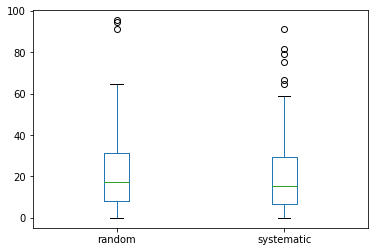

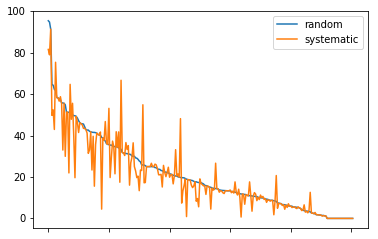

In [20]:
random_and_systematic_block_coverage = pd.concat(
    [random_block_coverage_per_app.percentage_covered.rename('random'), systematic_block_coverage_per_app.percentage_covered.rename('systematic')], axis=1,
    sort=False)
# random_and_systematic_coverage = random_and_systematic_coverage[
#     (random_and_systematic_coverage.random != 0) & (random_and_systematic_coverage.systematic != 0)]
random_and_systematic_coverage.plot.box()
random_and_systematic_coverage.plot()

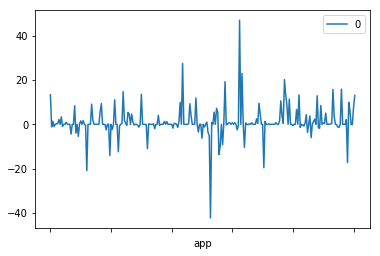

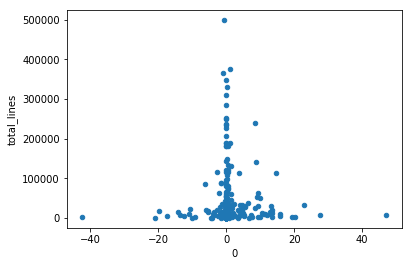

In [43]:
diff_in_coverage_per_app = random_and_systematic_block_coverage['random'] - random_and_systematic_block_coverage['systematic']
# systematic_block_coverage_per_app['percentage_covered'] = (systematic_block_coverage_per_app.covered_lines / systematic_block_coverage_per_app.total_lines) * 100
diff_in_coverage_per_app = diff_in_coverage_per_app.to_frame()
diff_in_coverage_per_app.plot()
diff_in_coverage_per_app["total_lines"] = random_block_coverage_per_app.total_lines
diff_in_coverage_per_app.head()

diff_in_coverage_per_app.plot.scatter(x=0, y="total_lines")

# diff_in_coverage_per_app.describe()

,random,systematic,total_lines
app,,,
alex.map.maps,20.455874,7.071888,1711
androidlab.carlog,10.744052,11.926049,13198
bestfreelivewallpapers.funny_photo_editor,5.770879,4.361941,60684
biz.andxor.hearingaid,11.866197,12.922535,2840
block.app.wars,0.000000,0.000000,223


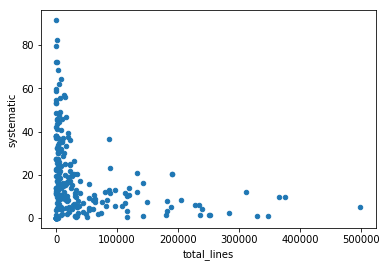

In [40]:

test = random_and_systematic_block_coverage
test["total_lines"] = random_block_coverage_per_app.total_lines
test.plot.scatter(y="systematic", x= "total_lines")
test.head()
